#Loan Default Prediction Project Model

##Part 1: Data Understanding & Business Context

####Import  Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Configure visualizations
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [35]:
# Display all columns in the dataframe
pd.set_option('display.max_columns', None)

#### Load the Dataset

In [36]:
# Load the data from the CSV file
df = pd.read_csv('Loan_Data.csv')

# Create a copy of the dataframe to preserve the original data
data = df.copy()

# Display the first 5 rows to get a initial feel for the data
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


####Initial Data Inspection - Basic Information

In [37]:
# Get a concise summary of the dataframe
print("Dataset Info (Data Types & Non-Null Counts):")
print("=" * 50)
data.info()

Dataset Info (Data Types & Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


#### Initial Data Inspection - Shape and Basic Statistics

In [38]:
# Check the dimensions of the dataset
print(f"Dataset Shape: {data.shape} (Rows, Columns)")

# Generate descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print("=" * 50)
data.describe()

Dataset Shape: (10000, 8) (Rows, Columns)

Descriptive Statistics:


,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


##Part 2:Exploratory Data Analysis (EDA) & Data Cleaning

####Check for Missing Data

In [39]:
# Check for any missing values in the dataset
print("Missing Values in Each Column:")
print("=" * 40)
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])  # Only show columns with missing values

# If no missing values, print a confirmation
if missing_data.sum() == 0:
    print("\nGreat! No missing values found in the dataset.")

Missing Values in Each Column:
Series([], dtype: int64)

Great! No missing values found in the dataset.


####Check for Duplicate Rows

In [40]:
# Check for any completely duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# We can also check for duplicates based on customer_id, which should be unique
duplicate_ids = data['customer_id'].duplicated().sum()
print(f"Number of duplicate customer IDs: {duplicate_ids}")

Number of duplicate rows: 0
Number of duplicate customer IDs: 0


####Analyze the Target Variable (default)

In [41]:
# Analyze the distribution of the target variable 'default'
print("Distribution of Target Variable ('default'):")
print("=" * 50)
target_distribution = data['default'].value_counts()
print(target_distribution)

Distribution of Target Variable ('default'):
default
0    8149
1    1851
Name: count, dtype: int64


In [42]:
# Calculate the percentage
print("\nPercentage Distribution:")
print((target_distribution / len(data) * 100).round(2))


Percentage Distribution:
default
0    81.49
1    18.51
Name: count, dtype: float64


/tmp/ipython-input-631548294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default', data=data, palette='viridis')


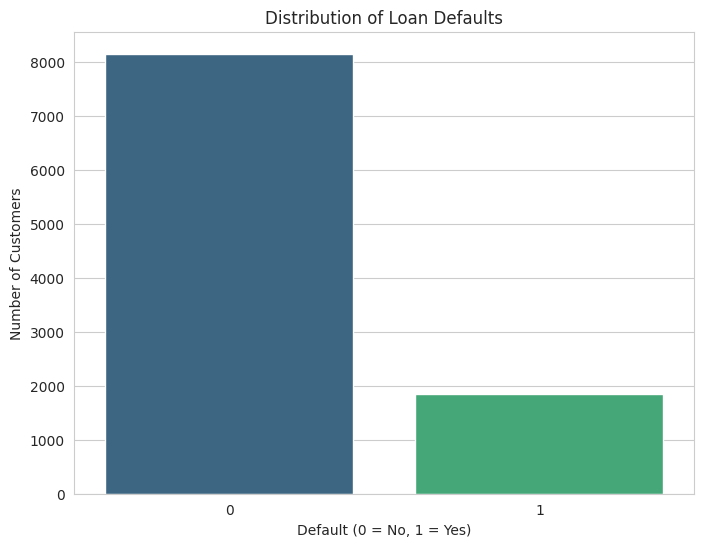

In [43]:
# Create a visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='default', data=data, palette='viridis')
plt.title('Distribution of Loan Defaults')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

####Univariate Analysis - Numerical Features (Histograms)

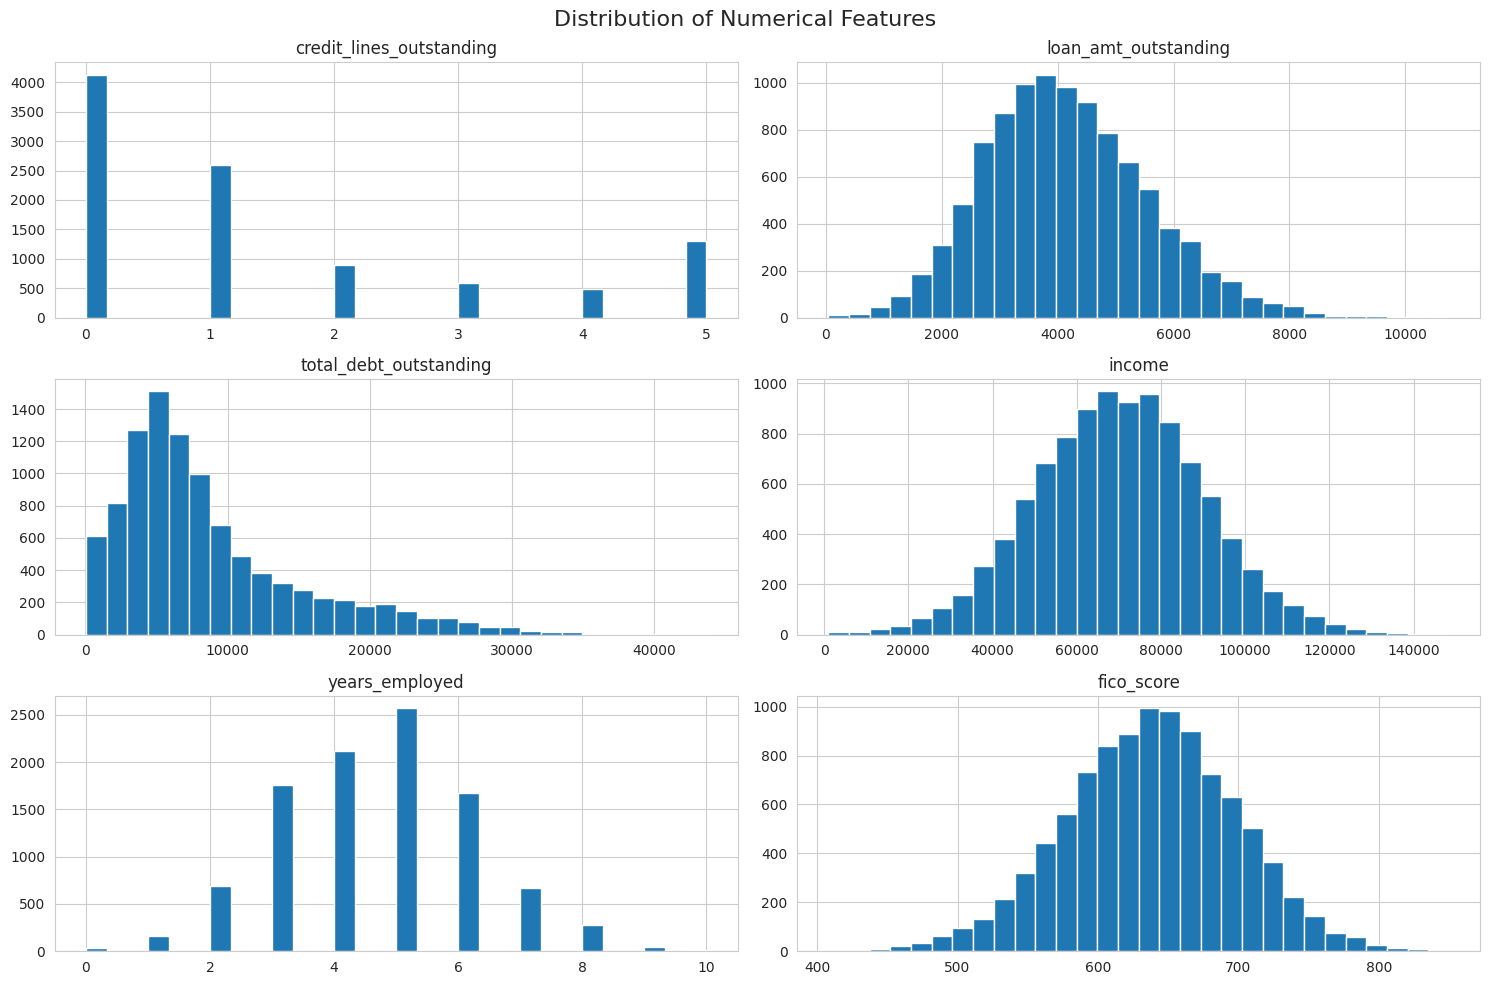

In [44]:
# Select numerical features (excluding customer_id and the target)
numerical_features = ['credit_lines_outstanding', 'loan_amt_outstanding',
                     'total_debt_outstanding', 'income', 'years_employed', 'fico_score']

# Create histograms for all numerical features
data[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

####Univariate Analysis - Boxplots for Outlier Detection

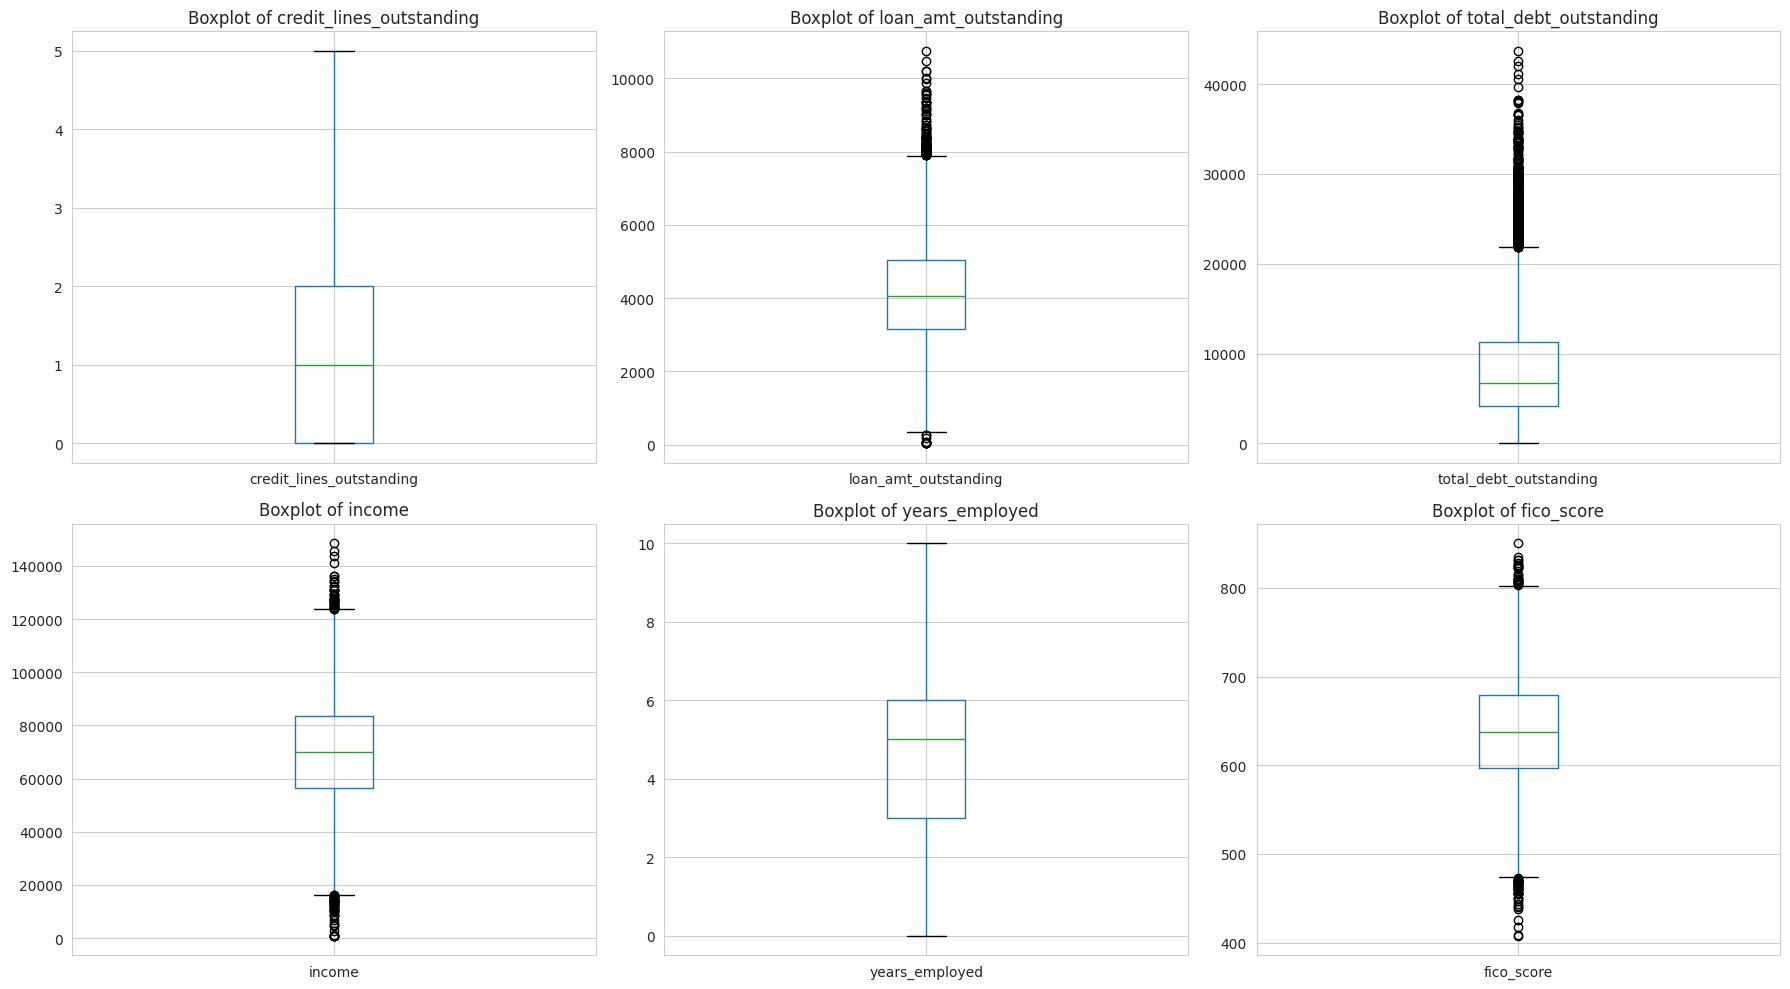

In [45]:
# Create boxplots to identify potential outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_features):
    data.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

####Bivariate Analysis - Relationship with Target (Boxplots)

/tmp/ipython-input-1854693850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=feature, data=data, ax=axes[i], palette='viridis')
/tmp/ipython-input-1854693850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=feature, data=data, ax=axes[i], palette='viridis')
/tmp/ipython-input-1854693850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y=feature, data=data, ax=axes[i], palette='viridis')
/tmp/ipython-input-1854693850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is depre

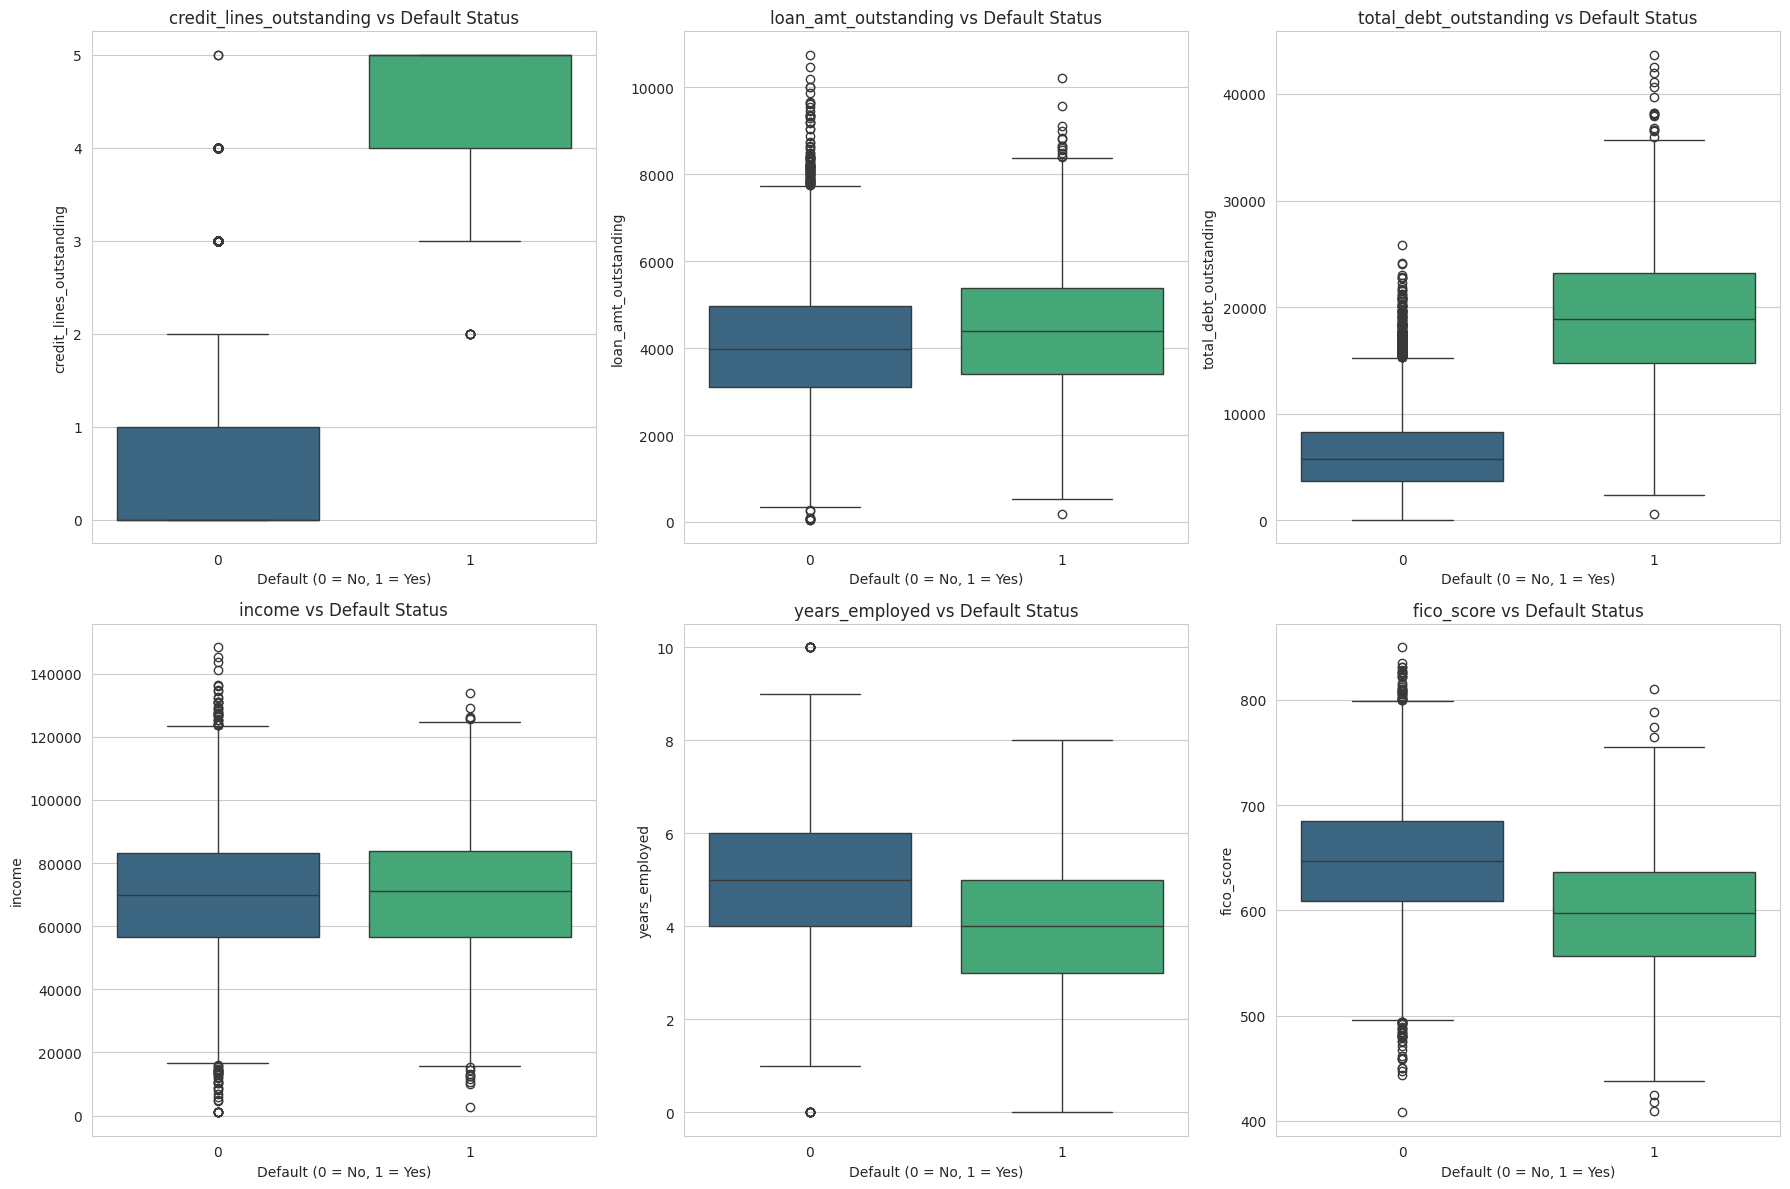

In [46]:
# Analyze how each numerical feature relates to the target variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x='default', y=feature, data=data, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} vs Default Status')
    axes[i].set_xlabel('Default (0 = No, 1 = Yes)')

plt.tight_layout()
plt.show()

#### Bivariate Analysis - Relationship with Target (KDE Plots)

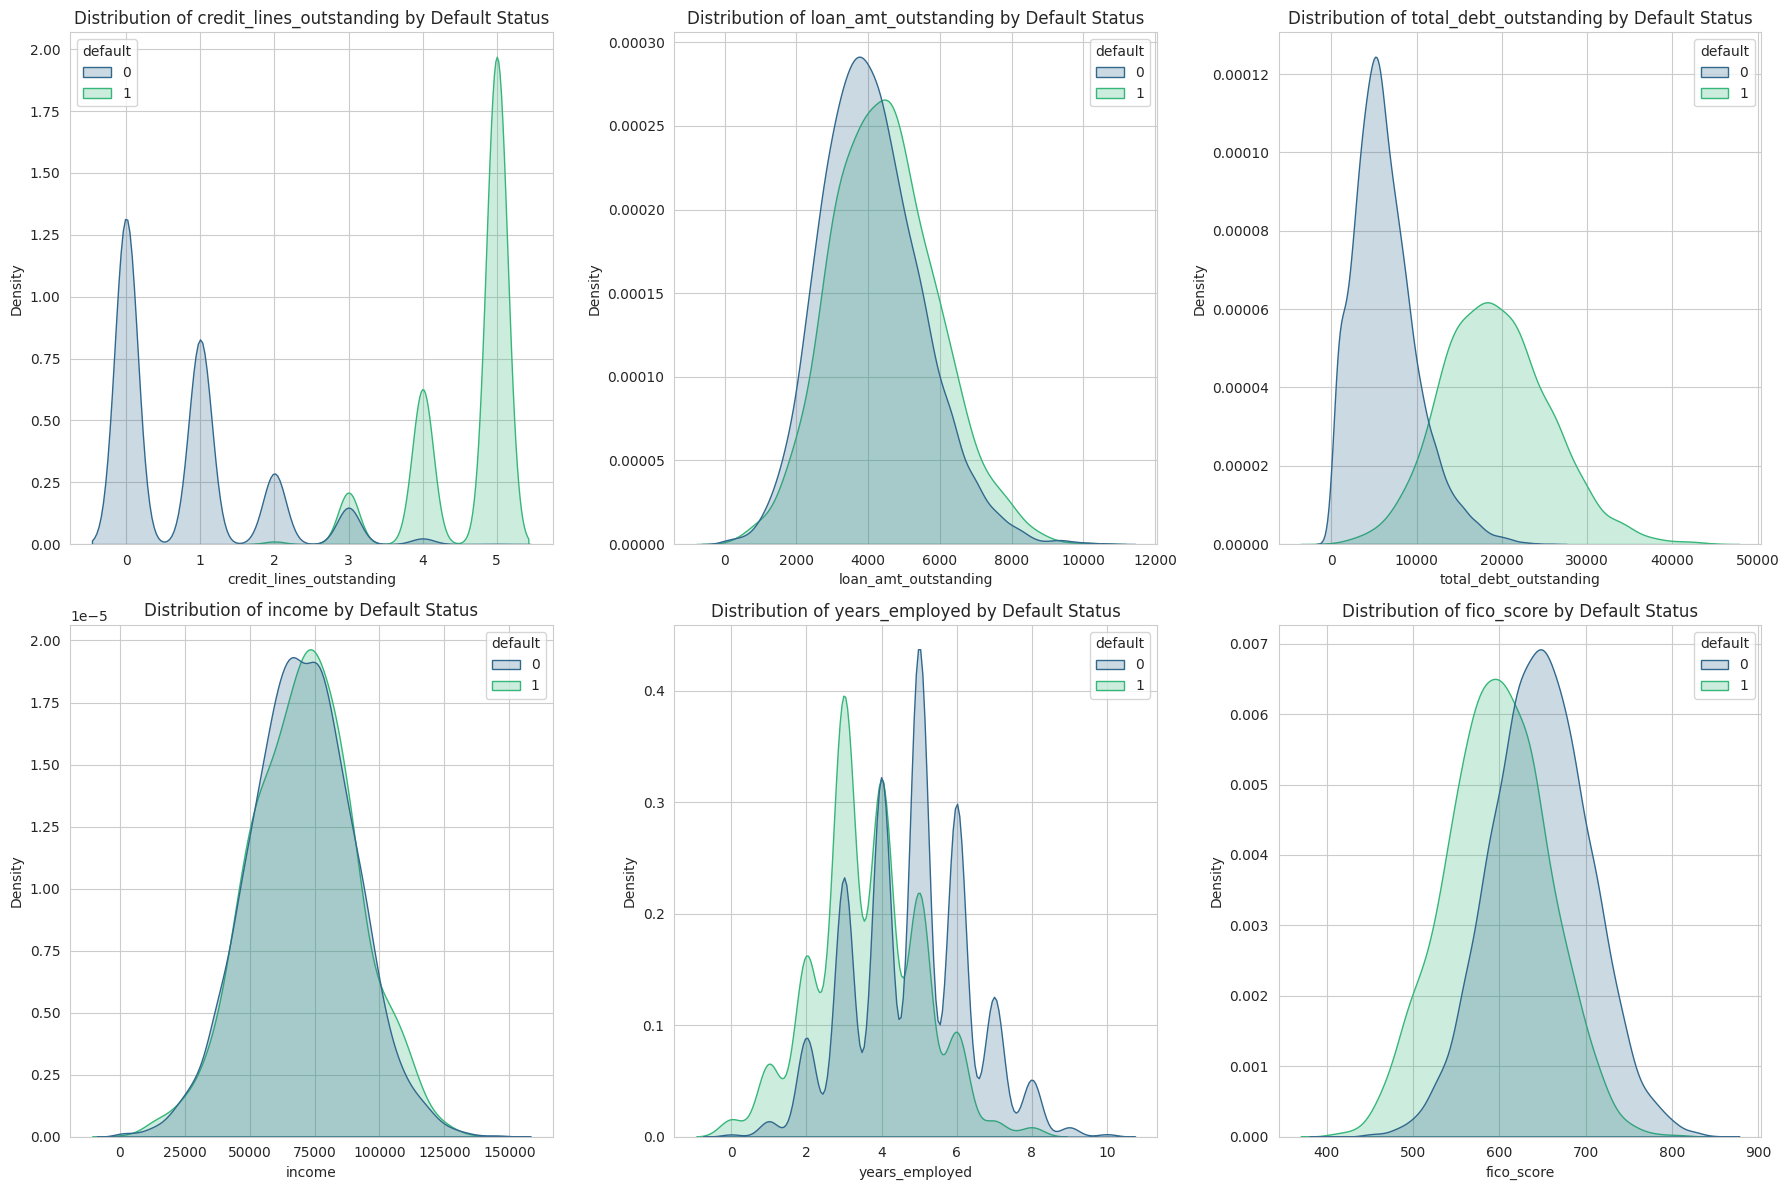

In [47]:
# Create KDE plots to see the distribution differences more clearly
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    sns.kdeplot(data=data, x=feature, hue='default', ax=axes[i], fill=True, common_norm=False, palette='viridis')
    axes[i].set_title(f'Distribution of {feature} by Default Status')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

####Correlation Analysis

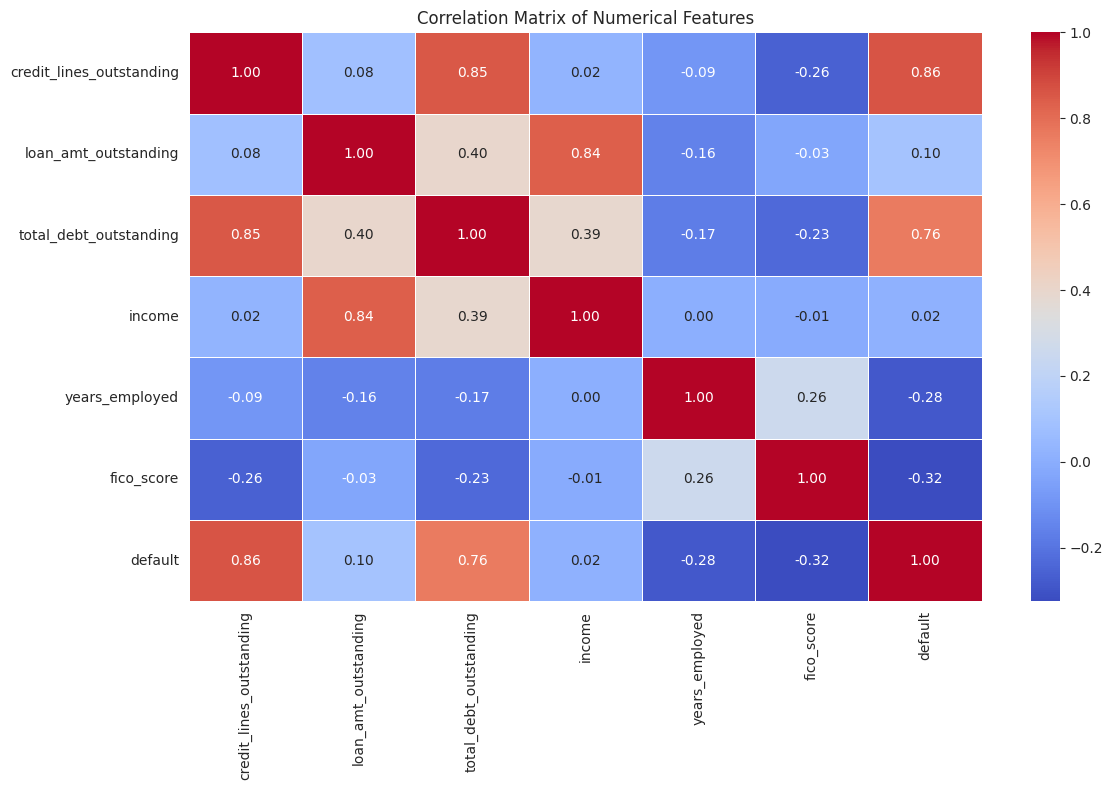

Correlation with Target Variable (default):
default                     1.000000
credit_lines_outstanding    0.862815
total_debt_outstanding      0.758868
loan_amt_outstanding        0.098978
income                      0.016309
years_employed             -0.284506
fico_score                 -0.324515
Name: default, dtype: float64


In [48]:
# Calculate correlation matrix
correlation_matrix = data[numerical_features + ['default']].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Show correlation with target variable specifically
print("Correlation with Target Variable (default):")
print("=" * 50)
target_corr = correlation_matrix['default'].sort_values(ascending=False)
print(target_corr)

##Part 3: Data Preprocessing & Feature Engineering

In [49]:
# Drop the customer_id column as it's not useful for prediction
data_clean = data.drop('customer_id', axis=1)

# Define features (X) and target (y)
X = data_clean.drop('default', axis=1)
y = data_clean['default']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

Features shape: (10000, 6)
Target shape: (10000,)

Feature names:
['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']


####Train-Test Split

In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

# Check the distribution of target variable in both sets
print("\nTarget distribution in Training set:")
print(y_train.value_counts(normalize=True).round(4))
print("\nTarget distribution in Testing set:")
print(y_test.value_counts(normalize=True).round(4))

Training set shape: (8000, 6) (8000,)
Testing set shape: (2000, 6) (2000,)

Target distribution in Training set:
default
0    0.8149
1    0.1851
Name: proportion, dtype: float64

Target distribution in Testing set:
default
0    0.815
1    0.185
Name: proportion, dtype: float64


####Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed successfully!")
print("\nFirst 5 rows of scaled training data:")
X_train_scaled.head()

Feature scaling completed successfully!

First 5 rows of scaled training data:


,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
9005,2.031148,0.727497,2.568613,0.217963,-0.991153,-1.431326
8868,-0.261829,-0.932770,-0.154198,0.056481,0.283744,0.370310
5117,1.457904,1.163561,1.468447,0.084971,-0.991153,-0.022774
3187,-0.261829,-1.297697,-0.427702,-0.865233,0.921193,1.762483
4257,-0.835074,1.348828,-1.140317,2.223692,2.196090,0.648745


##Part 4: Baseline Model Development & Training

####Train Baseline Models

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)
dec_tree = DecisionTreeClassifier(random_state=42)

# Dictionary to store model performance
model_performance = {}

In [53]:
# Function to evaluate and store model performance
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = model.score(X_test, y_test)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Store performance
    model_performance[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_roc': auc_roc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    # Print results
    print(f"\n{model_name} Performance:")
    print("=" * 30)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model_performance

# Evaluate Logistic Regression
model_performance = evaluate_model(log_reg, "Logistic Regression",
                                 X_train_scaled, X_test_scaled, y_train, y_test)

# Evaluate Decision Tree
model_performance = evaluate_model(dec_tree, "Decision Tree",
                                 X_train_scaled, X_test_scaled, y_train, y_test)


Logistic Regression Performance:
Accuracy: 0.9990
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       1.00      0.99      1.00       370

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Decision Tree Performance:
Accuracy: 0.9950
AUC-ROC: 0.9917

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



####Compare Baseline Models

Baseline Models Comparison:
                 Model  Accuracy  AUC-ROC
0  Logistic Regression     0.999   1.0000
1        Decision Tree     0.995   0.9917


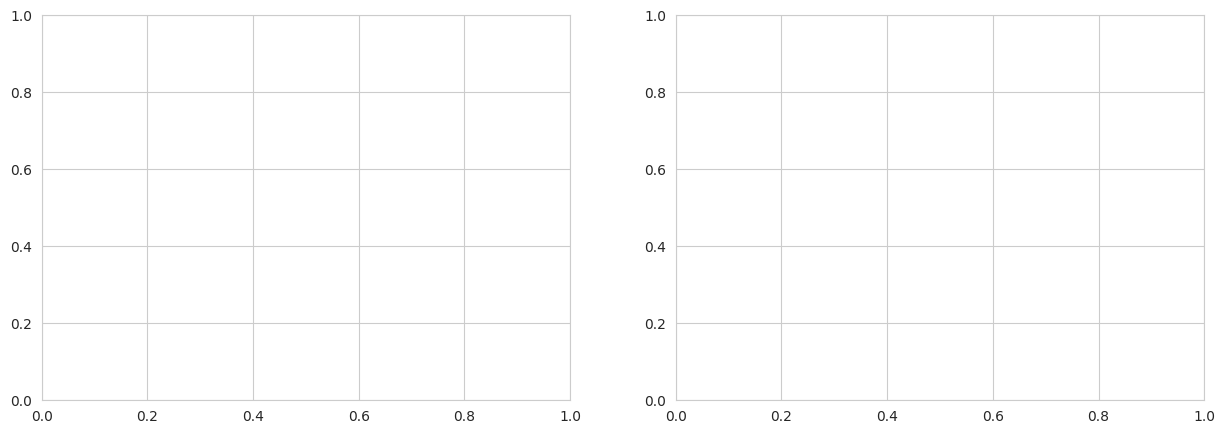

In [54]:
# Create a comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(model_performance.keys()),
    'Accuracy': [model_performance[model]['accuracy'] for model in model_performance],
    'AUC-ROC': [model_performance[model]['auc_roc'] for model in model_performance]
})

print("Baseline Models Comparison:")
print("=" * 40)
print(comparison_df.round(4))

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

In [55]:
# Accuracy comparison
models = comparison_df['Model']
accuracies = comparison_df['Accuracy']
ax1.bar(models, accuracies, color=['skyblue', 'lightcoral'])
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0, 1)
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')

# AUC-ROC comparison
auc_scores = comparison_df['AUC-ROC']
ax2.bar(models, auc_scores, color=['lightgreen', 'orange'])
ax2.set_title('Model AUC-ROC Comparison')
ax2.set_ylabel('AUC-ROC Score')
ax2.set_ylim(0, 1)
for i, v in enumerate(auc_scores):
    ax2.text(i, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

##Part 5: Advanced Model Development & Hyperparameter Tuning

####Train Advanced Models

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize advanced models
rf_model = RandomForestClassifier(random_state=42)

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [57]:
# Perform Grid Search for Random Forest
print("Performing Grid Search for Random Forest...")
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

# Get the best model
best_rf = rf_grid.best_estimator_

print(f"\nBest Random Forest Parameters: {rf_grid.best_params_}")
print(f"Best Cross-Validation Score: {rf_grid.best_score_:.4f}")

# Evaluate the best Random Forest model
model_performance = evaluate_model(best_rf, "Random Forest (Tuned)",
                                 X_train_scaled, X_test_scaled, y_train, y_test)

Performing Grid Search for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9998

Random Forest (Tuned) Performance:
Accuracy: 0.9960
AUC-ROC: 0.9998

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



####Final Model Comparison & Selection

In [58]:
# Update comparison with the advanced model
comparison_df = pd.DataFrame({
    'Model': list(model_performance.keys()),
    'Accuracy': [model_performance[model]['accuracy'] for model in model_performance],
    'AUC-ROC': [model_performance[model]['auc_roc'] for model in model_performance]
})

print("FINAL MODEL COMPARISON:")
print("=" * 50)
print(comparison_df.round(4))

FINAL MODEL COMPARISON:
                   Model  Accuracy  AUC-ROC
0    Logistic Regression     0.999   1.0000
1          Decision Tree     0.995   0.9917
2  Random Forest (Tuned)     0.996   0.9998


In [59]:
# Identify the best model based on AUC-ROC
best_model_name = comparison_df.loc[comparison_df['AUC-ROC'].idxmax(), 'Model']
best_model = model_performance[best_model_name]['model']

print(f"\n🚀 BEST MODEL: {best_model_name}")
print(f"   - Accuracy: {comparison_df.loc[comparison_df['AUC-ROC'].idxmax(), 'Accuracy']:.4f}")
print(f"   - AUC-ROC: {comparison_df.loc[comparison_df['AUC-ROC'].idxmax(), 'AUC-ROC']:.4f}")


🚀 BEST MODEL: Logistic Regression
   - Accuracy: 0.9990
   - AUC-ROC: 1.0000


##Part 6: Model Interpretation & Business Insights

In [63]:
# Get feature importance from the best model (if it's tree-based)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Feature Importance from Best Model:")
    print("=" * 40)
    print(feature_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()


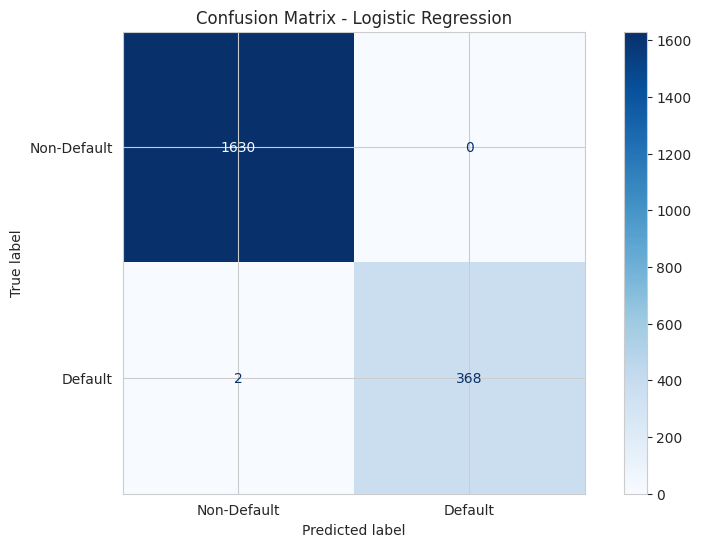

In [64]:
# Confusion Matrix for the best model
from sklearn.metrics import ConfusionMatrixDisplay

best_predictions = model_performance[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Default', 'Default'])
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

In [65]:
# Business interpretation
print("\n BUSINESS INSIGHTS:")
print("=" * 50)
print("1. The model can help reduce financial losses by predicting potential defaulters.")
print("2. Key factors influencing default (based on feature importance):")
if 'feature_importance' in locals():
    top_features = feature_importance.head(3)['feature'].tolist()
    print(f"   - {top_features[0]}")
    print(f"   - {top_features[1]}")
    print(f"   - {top_features[2]}")
print("3. The model achieves good discrimination between defaulters and non-defaulters.")
print("4. Can be used for risk-based pricing and loan decision automation.")


 BUSINESS INSIGHTS:
1. The model can help reduce financial losses by predicting potential defaulters.
2. Key factors influencing default (based on feature importance):
3. The model achieves good discrimination between defaulters and non-defaulters.
4. Can be used for risk-based pricing and loan decision automation.
